# <font color='blue'><div style="text-align: center">Ch 6. 독버섯 판별</font> 

* 버섯은 건강식품이지만 독버섯을 잘못 먹으면 사망에 이르를 수도 있다. 
![mushroom](https://drive.google.com/uc?id=1NEow1hpZUQvd3BLnT1sqRxk2BJOLrQ1N)

* 우리는 Decision Tree라는 통계적 방법론을 이용하여 독버섯을 분류를 할 것임
<br>

## 6.1 Decision Tree(의사결정나무)

* Decision Tree는 아래의 그림처럼 의사결정을 수행하는 기법이다. <br>
 ![DecisionTree](https://drive.google.com/uc?id=1PexyqvRQJ5Dp5euRRiATPp2CQ-vombZ7)

* 의사결정나무는 뿌리에서 출발해 최종 잎으로 가는 과정에서 매 순간 왼쪽, 오른쪽의 방향을 결정해야 한다.
* 방향 결정은 그 의사결정이 최종적으로 잘된 의사결정인지 아닌지에 의해 결정되지만, 그 순간 그것을 판단할 수 없다.
* 그러므로, 중간 의사결정 과정에서 엔트로피(entropy), 지니불순도(Gini Impurity) 등의 Measure를 사용한다.
    
* 여기서는 엔트로피에 대해 알아보자.

$$ \text {Entropy(S)} = \sum_{i=1}^c {-p_i \ log(p_i)} $$

In [0]:
import numpy as np
# p = 0.2, q = 0.8 인 문제의 엔트로피

print(-0.2 * np.log(0.2) - 0.8*np.log(0.8))
print(-0.5 * np.log(0.5) - 0.5*np.log(0.5))

0.5004024235381879
0.6931471805599453


* 엔트로피는 불확실성의 척도로 p=0.5에서 최대값을 갖는다.

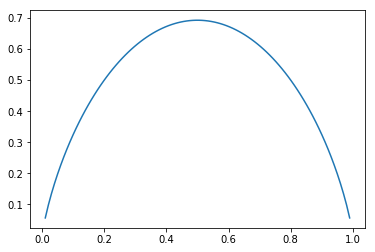

In [0]:
import matplotlib.pyplot as plt

p = np.linspace(0.01,0.99,100)
e = -p * np.log(p) - (1-p) * np.log(1-p)

plt.plot(p,e)
plt.show()


<center><img src="https://drive.google.com/uc?id=1U1a1ypu0y5nWYukqFCSgp2YqkwuFYKhJ" width="700" height="500"></center>



## 6.2 독버섯 분류

* 우리가 다룰 자료는  23 종류의 버섯에 대해 모자 모양, 모자 표면, 냄새, 줄기모양, 서식지 등 22개의 특징을 추출한 자료다.
* 이 자료를 이용해 독버섯 여부를 판별해보자. 


In [1]:
# Decision Tree를 위한 패키지 설치(설치후, 런타임 다시 시작~)

!pip install pydotplus
!pip install graphviz 
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/gdrive/My Drive/ML/data/mushrooms.csv')
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
pd.crosstab(df.cap_shape, df.type, margins=True)

type,edible,poisonous,All
cap_shape,,,
bell,404,48,452
conical,0,4,4
convex,1948,1708,3656
flat,1596,1556,3152
knobbed,228,600,828
sunken,32,0,32
All,4208,3916,8124


### <font color='blue'>  One hot Encoding </font>

* 컴퓨터는 문자를 직접 다룰 수 없다. 그러므로, 문자는 숫자로 변환해줘야 한다,
* 문자를 숫자로 변환하는 방법으로 남자 --> 1, 여자 -->2 의 방법도 있지만, 이 경우 숫자의 크기가 존재하는 문제 발생
* 다음으로는 남자는 (1,0), 여자는 (0,1) 로 표현하는 방식을 생각할 수 있는데 이 방식이 One-hot Encoding이다.


In [5]:
# 연습해보자.
cap_shape_onehot = pd.get_dummies(df[['cap_shape', 'cap_surface']])
cap_shape_onehot.head()

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth
0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1


In [6]:
# 실제 One hot encoding 실행

X_onehot = pd.get_dummies((df.drop(['type'], axis=1)))
X_onehot.head()

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_no,bruises_yes,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_free,gill_spacing_close,gill_spacing_crowded,gill_size_broad,gill_size_narrow,gill_color_black,gill_color_brown,gill_color_buff,...,stalk_color_below_ring_orange,stalk_color_below_ring_pink,stalk_color_below_ring_red,stalk_color_below_ring_white,stalk_color_below_ring_yellow,veil_type_partial,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
# Training / Test 분리

selMask = np.random.rand(len(X_onehot)) < 0.8   # 80% 는 Training, 20%는 Test
X_train = X_onehot[selMask]
X_test = X_onehot[~selMask]
y_train = df['type'][selMask]
y_test = df['type'][~selMask]

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matches = (predicted == y_test)
print(matches.sum() / len(matches))

1.0


In [9]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[848   0]
 [  0 756]]


* 다행히, DecisionTree로 독보섯을 100% 정확하게 분류할 수 있다.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


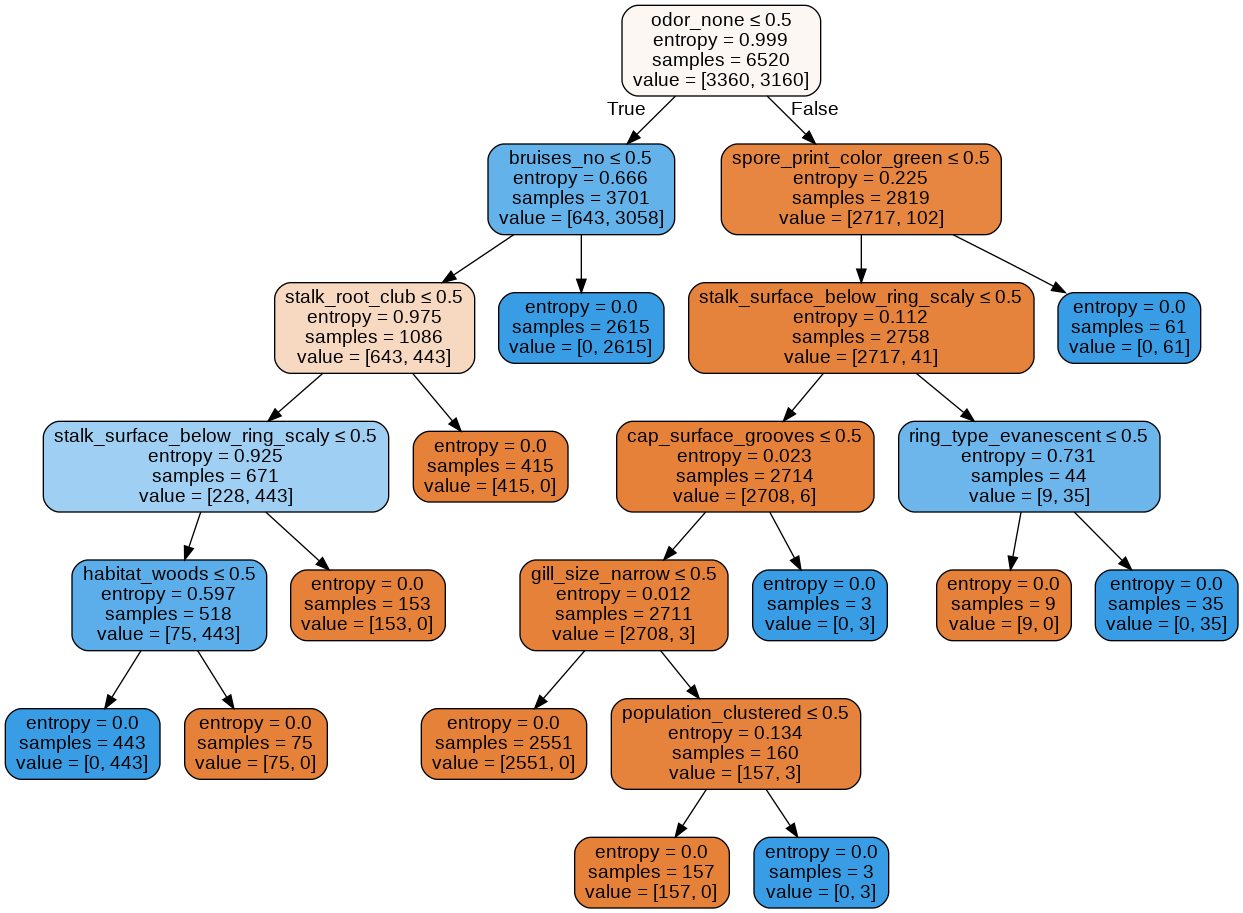

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  

from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_onehot.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())